In [1]:
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm as tqdm
from keras.models import load_model
from keras import backend as K
from datetime import datetime

from Dental_Tool.Data_processing import *
from Dental_Tool.Dental_Model import *
from Dental_Tool.Process_results import *
from Dental_Tool.Dataloader import *
from Dental_Tool.KFold_v2 import *

import keras.backend as K 
import matplotlib.pyplot as plt
import numpy as np
import keras
import time

Using TensorFlow backend.


In [2]:
# directory = [ 
#                 "Dental_Data/PBL/10_interdental_20200901_Max_4", 
#                 "Dental_Data/PBL/10_interdental_20200901_Max_4_Flip", 
#                 "Dental_Data/PBL/10_interdental_clahe_20200901_Max_4", 
#                 "Dental_Data/PBL/10_interdental_clahe_20200901_Max_4_Flip"
#             ]

directory = [ 
                "Dental_Data/PBL/10_20200901_Original", 
                "Dental_Data/PBL/10_20200901_Original_Flip", 
                "Dental_Data/PBL/10_clahe_20200901_Original", 
                "Dental_Data/PBL/10_clahe_20200901_Original_Flip"
            ]

directory = [ i + "/mapping.json" for i in directory]
argscale_num = 4

data = load_json(directory, interdental=False)
dataset = json_2_dataframe_PBL(data)
# dataset = json_2_dataframe_PBL_inderdental(data)
dataset

,Path,State,Class,source,tooth_num,angle
0,Dental_Data/PBL/10_20200901_Original/04-20-41-...,1,0,NN_191024_151623_BE78A8_6,6,5
1,Dental_Data/PBL/10_20200901_Original_Flip/04-2...,1,0,NN_191024_151623_BE78A8_6,6,5
2,Dental_Data/PBL/10_clahe_20200901_Original/04-...,1,0,NN_191024_151623_BE78A8_6,6,5
3,Dental_Data/PBL/10_clahe_20200901_Original_Fli...,1,0,NN_191024_151623_BE78A8_6,6,5
4,Dental_Data/PBL/10_20200901_Original/04-20-41-...,1,0,NN_191024_151623_BE78A8_7,7,5
...,...,...,...,...,...,...
19067,Dental_Data/PBL/10_clahe_20200901_Original_Fli...,2,1,NN_180917_113933_C0A0B2_27,27,3
19068,Dental_Data/PBL/10_20200901_Original/04-24-23-...,2,1,NN_180917_113933_C0A0B2_26,26,6
19069,Dental_Data/PBL/10_20200901_Original_Flip/04-2...,2,1,NN_180917_113933_C0A0B2_26,26,6
19070,Dental_Data/PBL/10_clahe_20200901_Original/04-...,2,1,NN_180917_113933_C0A0B2_26,26,6


stage 0: 2928, stage 1: 5252, stage 2: 2304, stage 3: 956
stage 0: 976, stage 1: 1748, stage 2: 752, stage 3: 312
stage 0: 976, stage 1: 1760, stage 2: 772, stage 3: 336
Training dataset: 2868, Validation dataset: 936, Testing dataset: 1008
set()
set()
set()
Fold 1: loading CNN_Net ......
Fold 1: loading Done, cost 1.3258578777313232 seconds
Epoch 1/30
90/90 [==============================] - 8s 88ms/step - loss: 1.5170 - accuracy: 0.4000 - val_loss: 5.2744 - val_accuracy: 0.3438

Epoch 00001: val_accuracy improved from -inf to 0.34375, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_1/CNN_Net_Fold_1/parameter/weights-improvement-01-0.3438.hdf5
Epoch 2/30
90/90 [==============================] - 5s 61ms/step - loss: 1.2036 - accuracy: 0.4899 - val_loss: 6.4761 - val_accuracy: 0.5073

Epoch 00002: val_accuracy improved from 0.34375 to 0.50729, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_1/CNN_Net_Fold_1/parameter/weights-improvement-02-0.5073.hdf5
Epoch 3/3

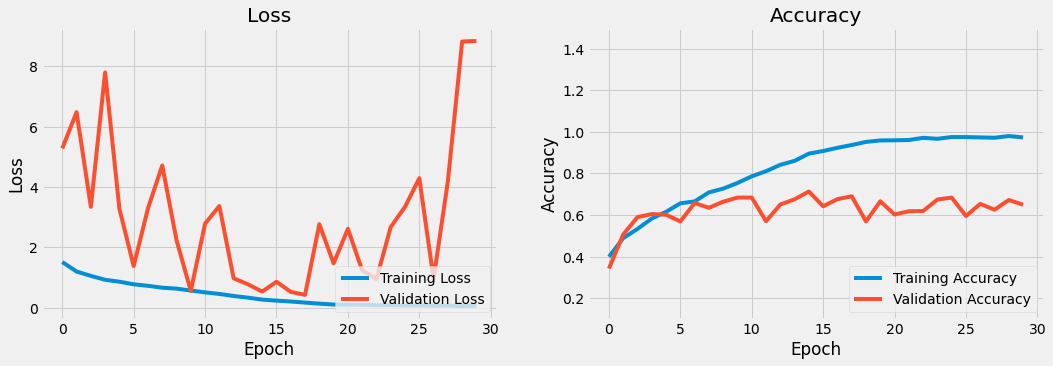

loading Results/Emsemble_5_Fold_20200911-150547/Fold_1/CNN_Net_Fold_1/parameter\weights-improvement-15-0.7135.hdf5 ......
loading Done, cost 1.3258578777313232 seconds
32/32 [==============================] - 1s 47ms/step
Accuracy  = 64.78 %


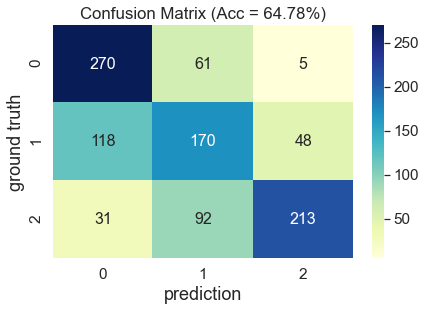

Fold 1: loading Inception ......
Fold 1: loading Done, cost 4.851377248764038 seconds
Epoch 1/30
90/90 [==============================] - 36s 403ms/step - loss: 1.5120 - accuracy: 0.3403 - val_loss: 12761746.0000 - val_accuracy: 0.3250

Epoch 00001: val_accuracy improved from -inf to 0.32500, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_1/Inception_Fold_1/parameter/weights-improvement-01-0.3250.hdf5
Epoch 2/30
90/90 [==============================] - 16s 183ms/step - loss: 1.1262 - accuracy: 0.3708 - val_loss: 5952.3398 - val_accuracy: 0.3500

Epoch 00002: val_accuracy improved from 0.32500 to 0.35000, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_1/Inception_Fold_1/parameter/weights-improvement-02-0.3500.hdf5
Epoch 3/30
90/90 [==============================] - 16s 183ms/step - loss: 1.0987 - accuracy: 0.3701 - val_loss: 43.8418 - val_accuracy: 0.3417

Epoch 00003: val_accuracy did not improve from 0.35000
Epoch 4/30
90/90 [==============================]

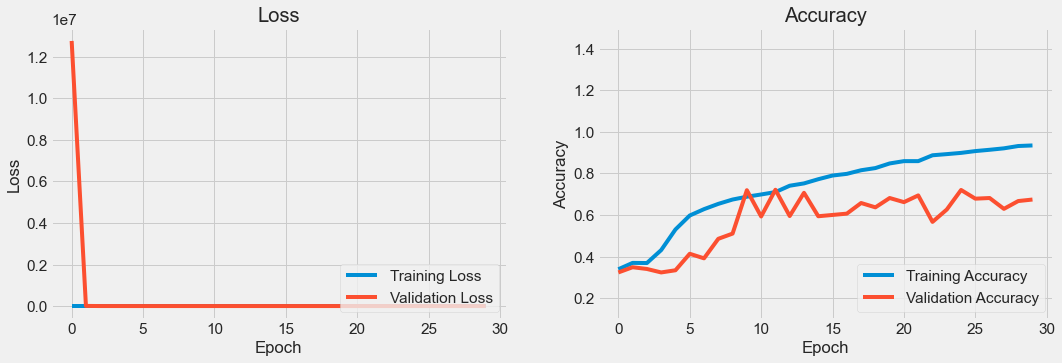

loading Results/Emsemble_5_Fold_20200911-150547/Fold_1/Inception_Fold_1/parameter\weights-improvement-12-0.7219.hdf5 ......
loading Done, cost 4.851377248764038 seconds
32/32 [==============================] - 3s 104ms/step
Accuracy  = 68.25 %


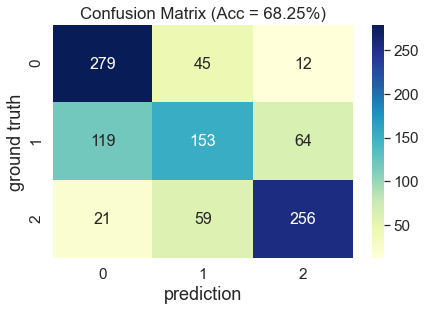

Fold 1: loading ResNet ......
Fold 1: loading Done, cost 2.76603364944458 seconds
Epoch 1/30
90/90 [==============================] - 30s 339ms/step - loss: 1.4767 - accuracy: 0.3448 - val_loss: 137.7086 - val_accuracy: 0.3250

Epoch 00001: val_accuracy improved from -inf to 0.32500, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_1/ResNet_Fold_1/parameter/weights-improvement-01-0.3250.hdf5
Epoch 2/30
90/90 [==============================] - 19s 208ms/step - loss: 1.1364 - accuracy: 0.3438 - val_loss: 906.5536 - val_accuracy: 0.3500

Epoch 00002: val_accuracy improved from 0.32500 to 0.35000, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_1/ResNet_Fold_1/parameter/weights-improvement-02-0.3500.hdf5
Epoch 3/30
90/90 [==============================] - 19s 208ms/step - loss: 1.1162 - accuracy: 0.3792 - val_loss: 1.1605 - val_accuracy: 0.3260

Epoch 00003: val_accuracy did not improve from 0.35000
Epoch 4/30
90/90 [==============================] - 19s 209ms/step

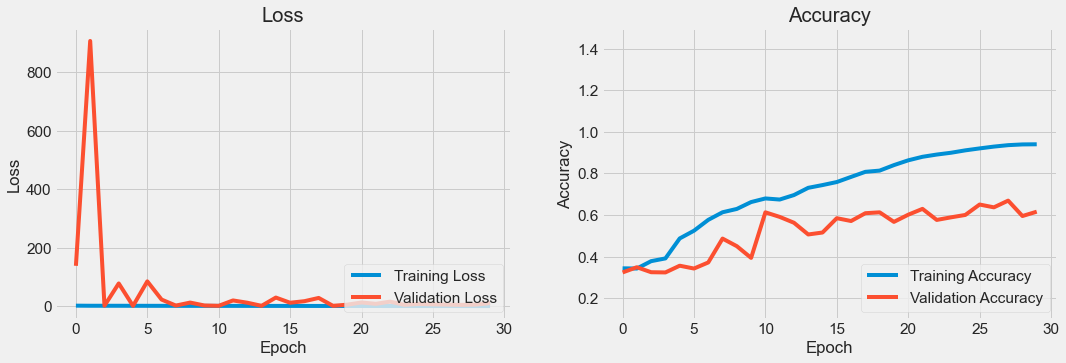

loading Results/Emsemble_5_Fold_20200911-150547/Fold_1/ResNet_Fold_1/parameter\weights-improvement-28-0.6698.hdf5 ......
loading Done, cost 2.76603364944458 seconds
32/32 [==============================] - 3s 100ms/step
Accuracy  = 62.90 %


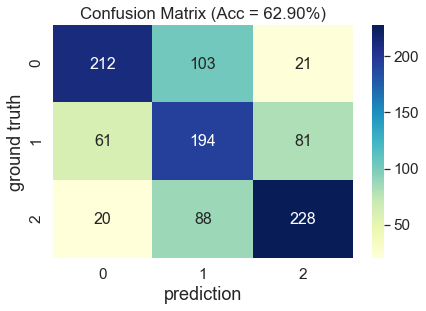

loading Results/Emsemble_5_Fold_20200911-150547/Fold_1/CNN_Net_Fold_1/parameter\weights-improvement-15-0.7135.hdf5 ......
loading Done, cost 6.913251638412476 seconds
32/32 [==============================] - 2s 68ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_1/Inception_Fold_1/parameter\weights-improvement-12-0.7219.hdf5 ......
loading Done, cost 454.05995178222656 seconds
32/32 [==============================] - 5s 161ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_1/ResNet_Fold_1/parameter\weights-improvement-28-0.6698.hdf5 ......
loading Done, cost 156.90195775032043 seconds
32/32 [==============================] - 4s 117ms/step
# of no majority: 39
Accuracy  = 69.64 %


D:\Dental_Project\Dental_Tool\Process_results.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[name] = results[idx]
D:\Dental_Project\Dental_Tool\Process_results.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Predict"] = vote_results


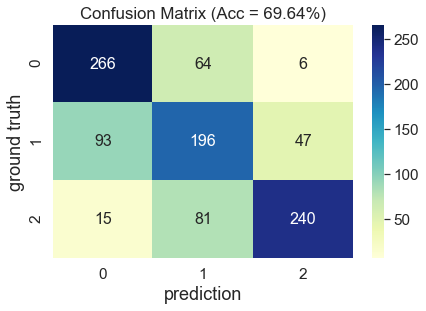

C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Vote: Accuracy  = 69.64 %, Probability: Accuracy  = 70.14 %


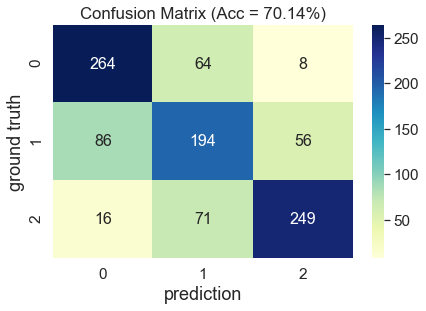

  Class 0 Class 1 Class 2  Acc
0     158       9       1  94%
1     108      55       5  64%
2      93     196      47  58%
3      15      81     240  71%
stage 0: 2928, stage 1: 5240, stage 2: 2284, stage 3: 944
stage 0: 976, stage 1: 1760, stage 2: 772, stage 3: 324
stage 0: 976, stage 1: 1760, stage 2: 772, stage 3: 336
Training dataset: 2832, Validation dataset: 972, Testing dataset: 1008
set()
set()
set()
Fold 2: loading CNN_Net ......
Fold 2: loading Done, cost 0.4111495018005371 seconds
Epoch 1/30
89/89 [==============================] - 11s 126ms/step - loss: 1.6387 - accuracy: 0.4129 - val_loss: 10.1313 - val_accuracy: 0.3669

Epoch 00001: val_accuracy improved from -inf to 0.36694, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_2/CNN_Net_Fold_2/parameter/weights-improvement-01-0.3669.hdf5
Epoch 2/30
89/89 [==============================] - 6s 67ms/step - loss: 1.2861 - accuracy: 0.5063 - val_loss: 3.0405 - val_accuracy: 0.4708

Epoch 00002: val_accuracy improved

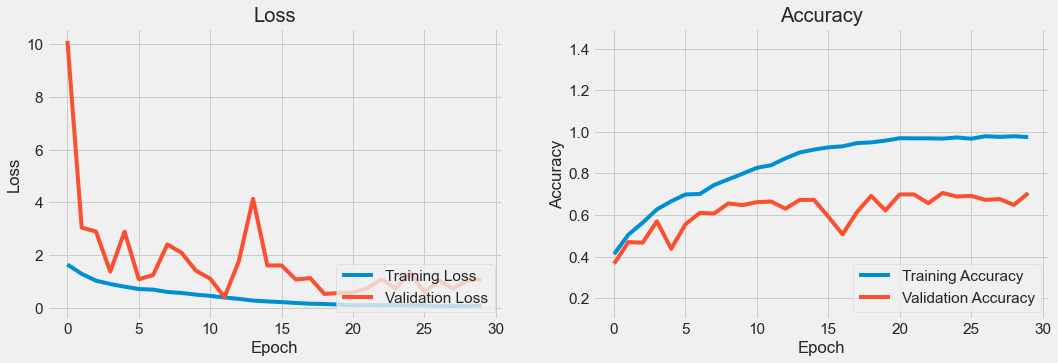

loading Results/Emsemble_5_Fold_20200911-150547/Fold_2/CNN_Net_Fold_2/parameter\weights-improvement-24-0.7067.hdf5 ......
loading Done, cost 0.4111495018005371 seconds
32/32 [==============================] - 8s 238ms/step
Accuracy  = 55.36 %


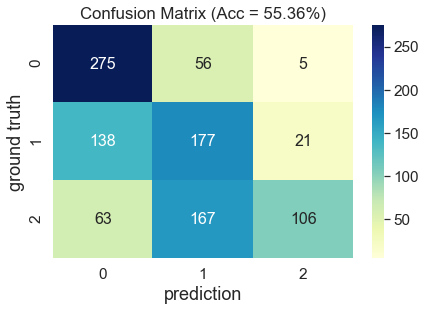

Fold 2: loading Inception ......
Fold 2: loading Done, cost 4.612996578216553 seconds
Epoch 1/30
89/89 [==============================] - 40s 449ms/step - loss: 1.6335 - accuracy: 0.3571 - val_loss: 10.8087 - val_accuracy: 0.3468

Epoch 00001: val_accuracy improved from -inf to 0.34677, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_2/Inception_Fold_2/parameter/weights-improvement-01-0.3468.hdf5
Epoch 2/30
89/89 [==============================] - 18s 202ms/step - loss: 1.1268 - accuracy: 0.3673 - val_loss: 189842.1875 - val_accuracy: 0.3468

Epoch 00002: val_accuracy did not improve from 0.34677
Epoch 3/30
89/89 [==============================] - 18s 203ms/step - loss: 1.1258 - accuracy: 0.3617 - val_loss: 3.2501 - val_accuracy: 0.3327

Epoch 00003: val_accuracy did not improve from 0.34677
Epoch 4/30
89/89 [==============================] - 18s 204ms/step - loss: 1.0961 - accuracy: 0.3869 - val_loss: 1915.5675 - val_accuracy: 0.3286

Epoch 00004: val_accuracy did not imp

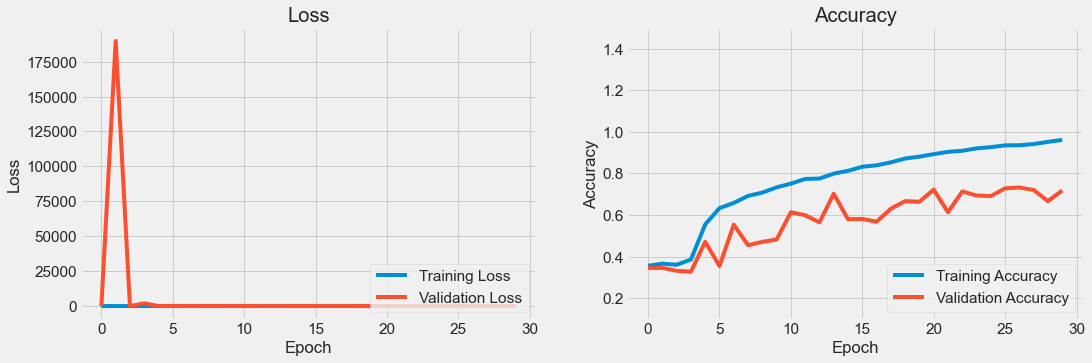

loading Results/Emsemble_5_Fold_20200911-150547/Fold_2/Inception_Fold_2/parameter\weights-improvement-27-0.7329.hdf5 ......
loading Done, cost 4.612996578216553 seconds
32/32 [==============================] - 6s 197ms/step
Accuracy  = 59.52 %


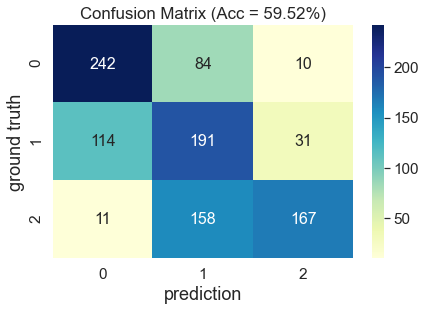

Fold 2: loading ResNet ......
Fold 2: loading Done, cost 2.793785333633423 seconds
Epoch 1/30
89/89 [==============================] - 35s 388ms/step - loss: 1.4879 - accuracy: 0.3409 - val_loss: 87.5490 - val_accuracy: 0.3266

Epoch 00001: val_accuracy improved from -inf to 0.32661, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_2/ResNet_Fold_2/parameter/weights-improvement-01-0.3266.hdf5
Epoch 2/30
89/89 [==============================] - 20s 223ms/step - loss: 1.1259 - accuracy: 0.3627 - val_loss: 4344.6357 - val_accuracy: 0.3468

Epoch 00002: val_accuracy improved from 0.32661 to 0.34677, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_2/ResNet_Fold_2/parameter/weights-improvement-02-0.3468.hdf5
Epoch 3/30
89/89 [==============================] - 20s 223ms/step - loss: 1.0836 - accuracy: 0.4171 - val_loss: 70.9434 - val_accuracy: 0.3246

Epoch 00003: val_accuracy did not improve from 0.34677
Epoch 4/30
89/89 [==============================] - 20s 223ms/st

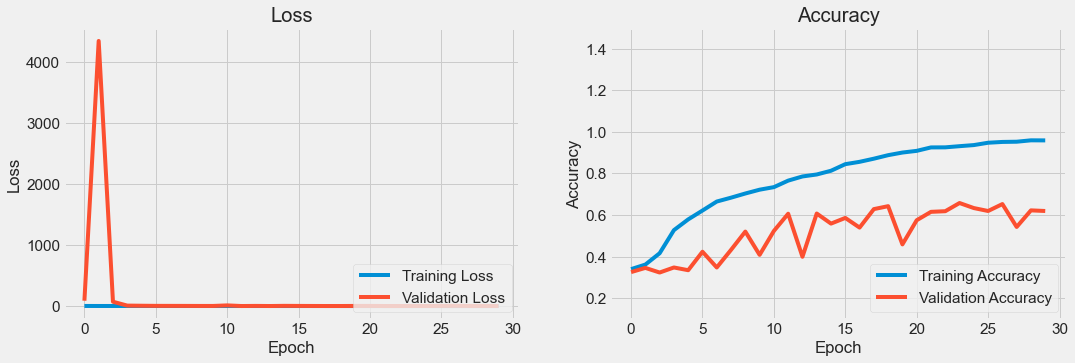

loading Results/Emsemble_5_Fold_20200911-150547/Fold_2/ResNet_Fold_2/parameter\weights-improvement-24-0.6583.hdf5 ......
loading Done, cost 2.793785333633423 seconds
32/32 [==============================] - 3s 94ms/step
Accuracy  = 49.70 %


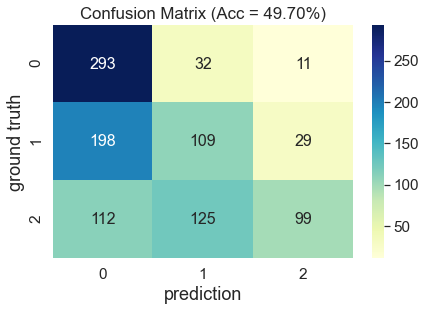

loading Results/Emsemble_5_Fold_20200911-150547/Fold_2/CNN_Net_Fold_2/parameter\weights-improvement-24-0.7067.hdf5 ......
loading Done, cost 5.0577874183654785 seconds
32/32 [==============================] - 2s 68ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_2/Inception_Fold_2/parameter\weights-improvement-27-0.7329.hdf5 ......
loading Done, cost 464.7289230823517 seconds
32/32 [==============================] - 8s 251ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_2/ResNet_Fold_2/parameter\weights-improvement-24-0.6583.hdf5 ......
loading Done, cost 158.4914140701294 seconds
32/32 [==============================] - 6s 190ms/step
# of no majority: 58
Accuracy  = 56.55 %


D:\Dental_Project\Dental_Tool\Process_results.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[name] = results[idx]
D:\Dental_Project\Dental_Tool\Process_results.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Predict"] = vote_results


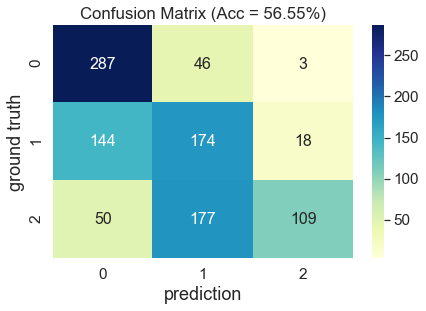

C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Vote: Accuracy  = 56.55 %, Probability: Accuracy  = 58.04 %


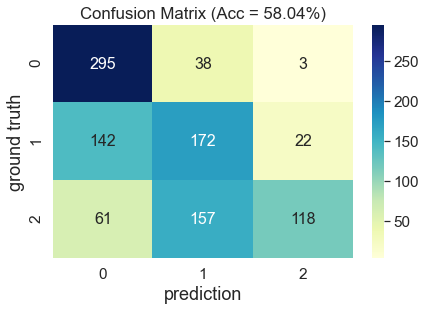

  Class 0 Class 1 Class 2  Acc
0     162       5       1  96%
1     125      41       2  74%
2     144     174      18  52%
3      50     177     109  32%
stage 0: 2928, stage 1: 5252, stage 2: 2304, stage 3: 956
stage 0: 976, stage 1: 1760, stage 2: 772, stage 3: 324
stage 0: 976, stage 1: 1748, stage 2: 752, stage 3: 324
Training dataset: 2868, Validation dataset: 972, Testing dataset: 972
set()
set()
set()
Fold 3: loading CNN_Net ......
Fold 3: loading Done, cost 0.4130375385284424 seconds
Epoch 1/30
90/90 [==============================] - 25s 277ms/step - loss: 1.4578 - accuracy: 0.4462 - val_loss: 5.1835 - val_accuracy: 0.3831

Epoch 00001: val_accuracy improved from -inf to 0.38306, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_3/CNN_Net_Fold_3/parameter/weights-improvement-01-0.3831.hdf5
Epoch 2/30
90/90 [==============================] - 7s 75ms/step - loss: 1.0430 - accuracy: 0.5649 - val_loss: 0.6129 - val_accuracy: 0.4083

Epoch 00002: val_accuracy improved f

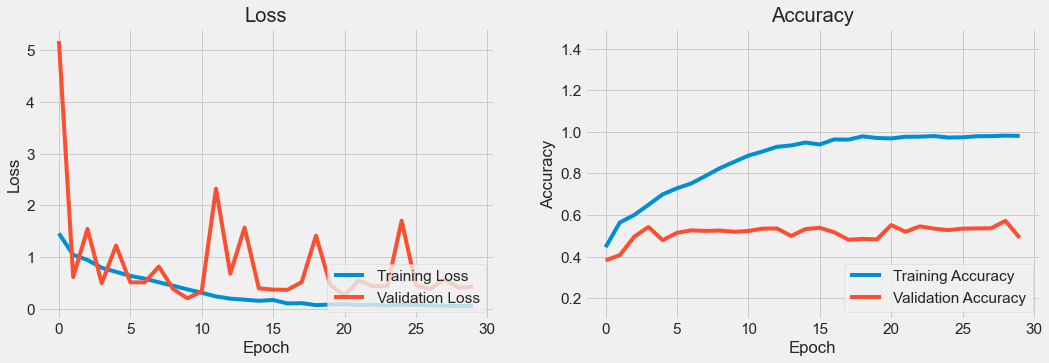

loading Results/Emsemble_5_Fold_20200911-150547/Fold_3/CNN_Net_Fold_3/parameter\weights-improvement-29-0.5726.hdf5 ......
loading Done, cost 0.4130375385284424 seconds
31/31 [==============================] - 10s 317ms/step
Accuracy  = 62.96 %


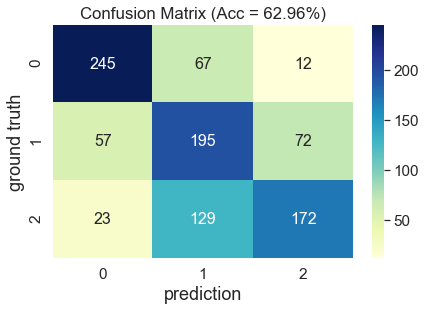

Fold 3: loading Inception ......
Fold 3: loading Done, cost 4.620725154876709 seconds
Epoch 1/30
90/90 [==============================] - 46s 507ms/step - loss: 1.4806 - accuracy: 0.3319 - val_loss: 1.0118 - val_accuracy: 0.3115

Epoch 00001: val_accuracy improved from -inf to 0.31149, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_3/Inception_Fold_3/parameter/weights-improvement-01-0.3115.hdf5
Epoch 2/30
90/90 [==============================] - 21s 231ms/step - loss: 1.1464 - accuracy: 0.3344 - val_loss: 121807.0938 - val_accuracy: 0.3266

Epoch 00002: val_accuracy improved from 0.31149 to 0.32661, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_3/Inception_Fold_3/parameter/weights-improvement-02-0.3266.hdf5
Epoch 3/30
90/90 [==============================] - 21s 231ms/step - loss: 1.0742 - accuracy: 0.4292 - val_loss: 605.4152 - val_accuracy: 0.3468

Epoch 00003: val_accuracy improved from 0.32661 to 0.34677, saving model to Results/Emsemble_5_Fold_20200911

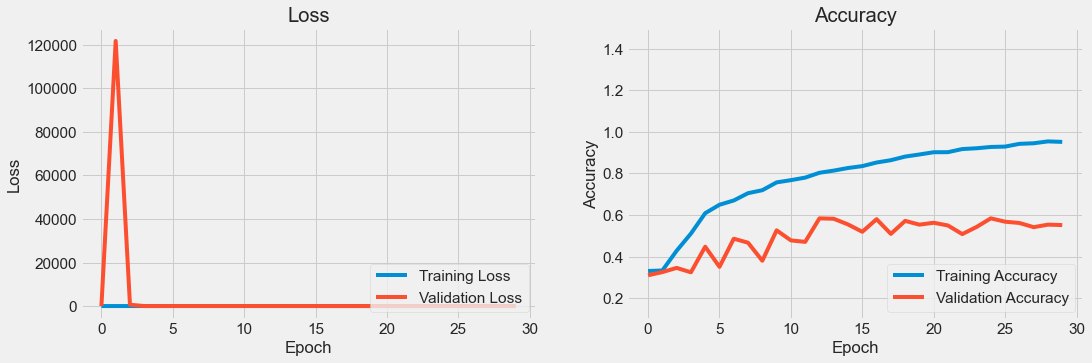

loading Results/Emsemble_5_Fold_20200911-150547/Fold_3/Inception_Fold_3/parameter\weights-improvement-13-0.5847.hdf5 ......
loading Done, cost 4.620725154876709 seconds
31/31 [==============================] - 9s 297ms/step
Accuracy  = 66.98 %


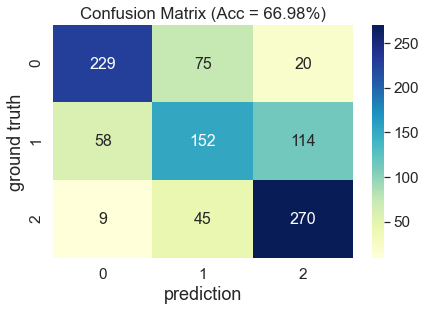

Fold 3: loading ResNet ......
Fold 3: loading Done, cost 2.8176403045654297 seconds
Epoch 1/30
90/90 [==============================] - 37s 413ms/step - loss: 1.5602 - accuracy: 0.3458 - val_loss: 90.3918 - val_accuracy: 0.3266

Epoch 00001: val_accuracy improved from -inf to 0.32661, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_3/ResNet_Fold_3/parameter/weights-improvement-01-0.3266.hdf5
Epoch 2/30
90/90 [==============================] - 21s 235ms/step - loss: 1.1272 - accuracy: 0.3708 - val_loss: 86.2390 - val_accuracy: 0.3276

Epoch 00002: val_accuracy improved from 0.32661 to 0.32762, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_3/ResNet_Fold_3/parameter/weights-improvement-02-0.3276.hdf5
Epoch 3/30
90/90 [==============================] - 21s 234ms/step - loss: 1.0807 - accuracy: 0.4212 - val_loss: 8.7386 - val_accuracy: 0.3266

Epoch 00003: val_accuracy did not improve from 0.32762
Epoch 4/30
90/90 [==============================] - 21s 236ms/step

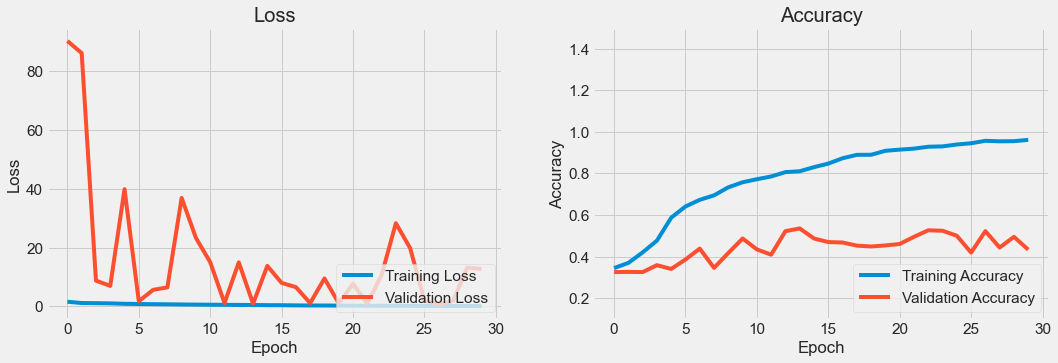

loading Results/Emsemble_5_Fold_20200911-150547/Fold_3/ResNet_Fold_3/parameter\weights-improvement-14-0.5363.hdf5 ......
loading Done, cost 2.8176403045654297 seconds
31/31 [==============================] - 4s 113ms/step
Accuracy  = 63.48 %


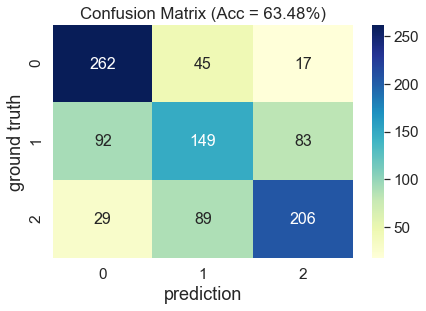

loading Results/Emsemble_5_Fold_20200911-150547/Fold_3/CNN_Net_Fold_3/parameter\weights-improvement-29-0.5726.hdf5 ......
loading Done, cost 5.08667516708374 seconds
31/31 [==============================] - 2s 75ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_3/Inception_Fold_3/parameter\weights-improvement-13-0.5847.hdf5 ......
loading Done, cost 478.0271739959717 seconds
31/31 [==============================] - 10s 338ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_3/ResNet_Fold_3/parameter\weights-improvement-14-0.5363.hdf5 ......
loading Done, cost 163.1189830303192 seconds
31/31 [==============================] - 8s 266ms/step
# of no majority: 32
Accuracy  = 69.14 %


D:\Dental_Project\Dental_Tool\Process_results.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[name] = results[idx]
D:\Dental_Project\Dental_Tool\Process_results.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Predict"] = vote_results


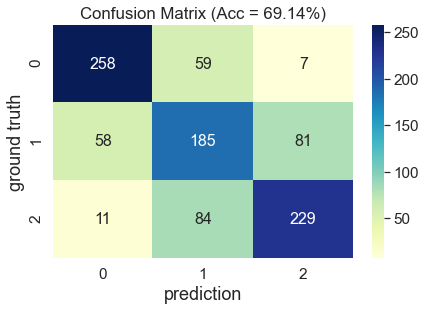

C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Vote: Accuracy  = 69.14 %, Probability: Accuracy  = 69.75 %


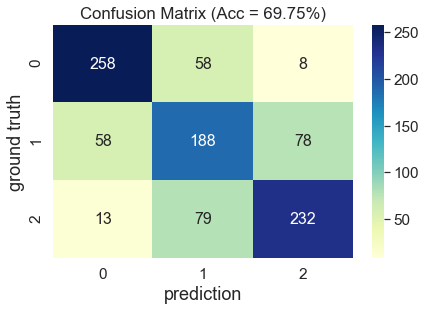

  Class 0 Class 1 Class 2  Acc
0     154       6       2  95%
1     104      53       5  64%
2      58     185      81  57%
3      11      84     229  71%
stage 0: 2912, stage 1: 5260, stage 2: 2284, stage 3: 964
stage 0: 976, stage 1: 1748, stage 2: 752, stage 3: 312
stage 0: 992, stage 1: 1752, stage 2: 792, stage 3: 328
Training dataset: 2892, Validation dataset: 936, Testing dataset: 984
set()
set()
set()
Fold 4: loading CNN_Net ......
Fold 4: loading Done, cost 0.4263648986816406 seconds
Epoch 1/30
91/91 [==============================] - 35s 384ms/step - loss: 1.4989 - accuracy: 0.4289 - val_loss: 0.6954 - val_accuracy: 0.3719

Epoch 00001: val_accuracy improved from -inf to 0.37187, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_4/CNN_Net_Fold_4/parameter/weights-improvement-01-0.3719.hdf5
Epoch 2/30
91/91 [==============================] - 20s 220ms/step - loss: 1.2216 - accuracy: 0.4948 - val_loss: 5.2211 - val_accuracy: 0.3865

Epoch 00002: val_accuracy improved

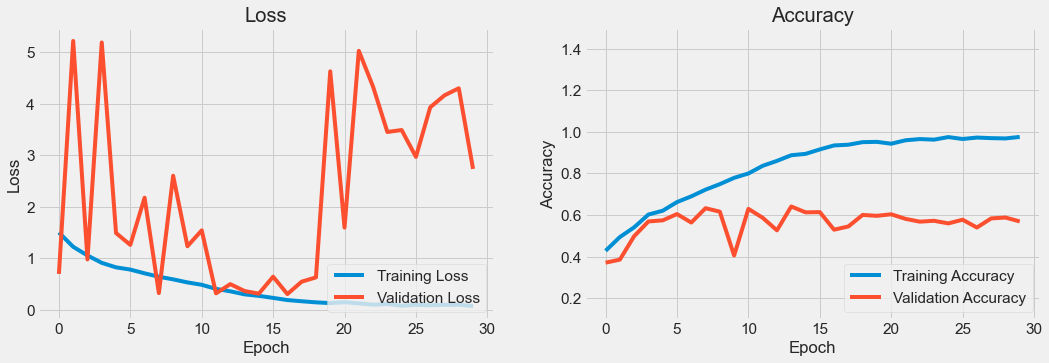

loading Results/Emsemble_5_Fold_20200911-150547/Fold_4/CNN_Net_Fold_4/parameter\weights-improvement-14-0.6417.hdf5 ......
loading Done, cost 0.4263648986816406 seconds
31/31 [==============================] - 14s 447ms/step
Accuracy  = 65.55 %


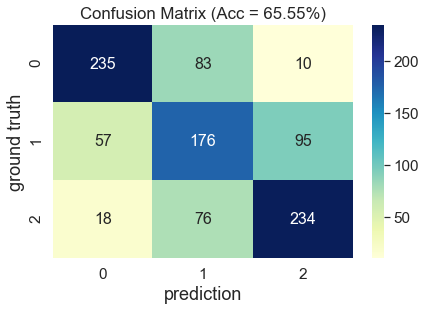

Fold 4: loading Inception ......
Fold 4: loading Done, cost 53.4091682434082 seconds
Epoch 1/30
91/91 [==============================] - 48s 532ms/step - loss: 1.5383 - accuracy: 0.3424 - val_loss: 159.7280 - val_accuracy: 0.3500

Epoch 00001: val_accuracy improved from -inf to 0.35000, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_4/Inception_Fold_4/parameter/weights-improvement-01-0.3500.hdf5
Epoch 2/30
91/91 [==============================] - 22s 236ms/step - loss: 1.1401 - accuracy: 0.3589 - val_loss: 25531.5039 - val_accuracy: 0.3500

Epoch 00002: val_accuracy did not improve from 0.35000
Epoch 3/30
91/91 [==============================] - 22s 239ms/step - loss: 1.1116 - accuracy: 0.3788 - val_loss: 273.4403 - val_accuracy: 0.3250

Epoch 00003: val_accuracy did not improve from 0.35000
Epoch 4/30
91/91 [==============================] - 22s 241ms/step - loss: 1.1101 - accuracy: 0.3396 - val_loss: 3.0933 - val_accuracy: 0.3510

Epoch 00004: val_accuracy improved from

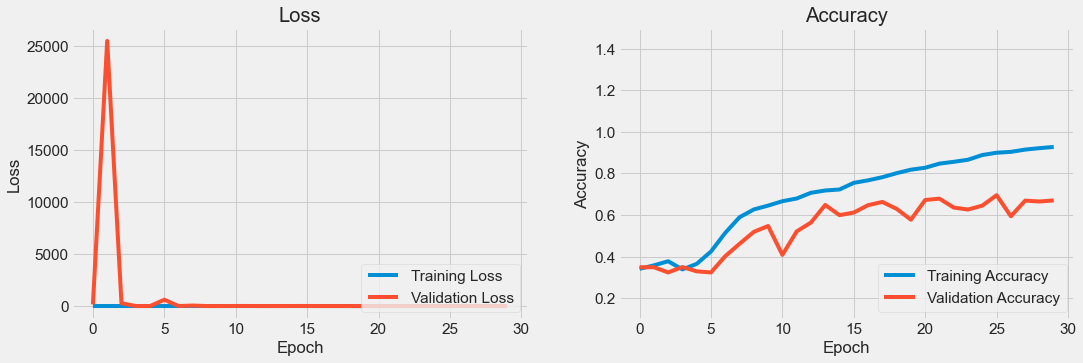

loading Results/Emsemble_5_Fold_20200911-150547/Fold_4/Inception_Fold_4/parameter\weights-improvement-26-0.6958.hdf5 ......
loading Done, cost 53.4091682434082 seconds
31/31 [==============================] - 11s 344ms/step
Accuracy  = 73.07 %


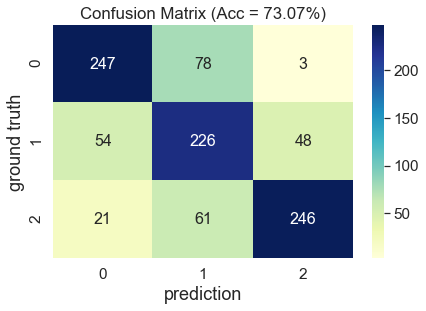

Fold 4: loading ResNet ......
Fold 4: loading Done, cost 2.801790714263916 seconds
Epoch 1/30
91/91 [==============================] - 40s 441ms/step - loss: 1.4687 - accuracy: 0.3317 - val_loss: 1.1721 - val_accuracy: 0.3500

Epoch 00001: val_accuracy improved from -inf to 0.35000, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_4/ResNet_Fold_4/parameter/weights-improvement-01-0.3500.hdf5
Epoch 2/30
91/91 [==============================] - 22s 245ms/step - loss: 1.1283 - accuracy: 0.3444 - val_loss: 1.0737 - val_accuracy: 0.3385

Epoch 00002: val_accuracy did not improve from 0.35000
Epoch 3/30
91/91 [==============================] - 22s 246ms/step - loss: 1.1106 - accuracy: 0.3283 - val_loss: 4.9751 - val_accuracy: 0.3250

Epoch 00003: val_accuracy did not improve from 0.35000
Epoch 4/30
91/91 [==============================] - 22s 246ms/step - loss: 1.1055 - accuracy: 0.3650 - val_loss: 9.5442 - val_accuracy: 0.3250

Epoch 00004: val_accuracy did not improve from 0.350

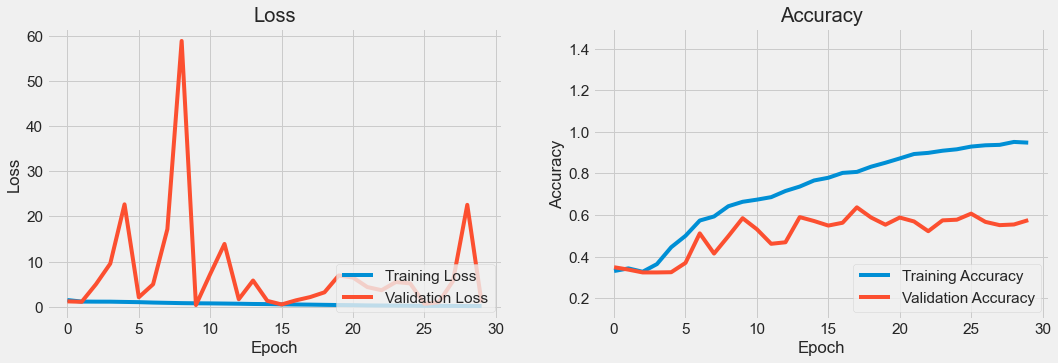

loading Results/Emsemble_5_Fold_20200911-150547/Fold_4/ResNet_Fold_4/parameter\weights-improvement-18-0.6375.hdf5 ......
loading Done, cost 2.801790714263916 seconds
31/31 [==============================] - 5s 156ms/step
Accuracy  = 65.75 %


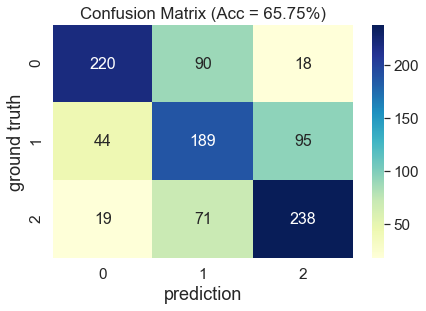

loading Results/Emsemble_5_Fold_20200911-150547/Fold_4/CNN_Net_Fold_4/parameter\weights-improvement-14-0.6417.hdf5 ......
loading Done, cost 7.856399774551392 seconds
31/31 [==============================] - 3s 108ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_4/Inception_Fold_4/parameter\weights-improvement-26-0.6958.hdf5 ......
loading Done, cost 482.0265657901764 seconds
31/31 [==============================] - 11s 350ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_4/ResNet_Fold_4/parameter\weights-improvement-18-0.6375.hdf5 ......
loading Done, cost 172.37813997268677 seconds
31/31 [==============================] - 9s 282ms/step
# of no majority: 26
Accuracy  = 73.17 %


D:\Dental_Project\Dental_Tool\Process_results.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[name] = results[idx]
D:\Dental_Project\Dental_Tool\Process_results.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Predict"] = vote_results


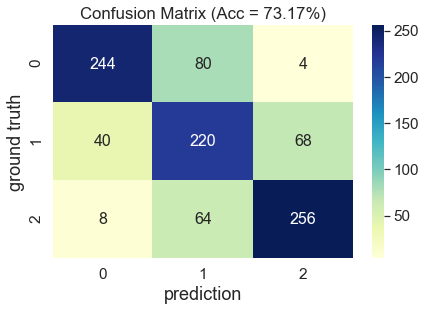

C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Vote: Accuracy  = 73.17 %, Probability: Accuracy  = 73.07 %


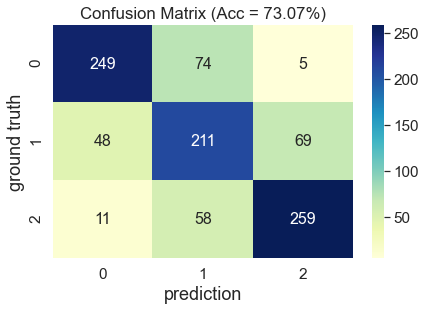

  Class 0 Class 1 Class 2  Acc
0     140      23       1  85%
1     104      57       3  63%
2      40     220      68  67%
3       8      64     256  78%
stage 0: 2912, stage 1: 5260, stage 2: 2284, stage 3: 964
stage 0: 992, stage 1: 1752, stage 2: 792, stage 3: 316
stage 0: 976, stage 1: 1748, stage 2: 752, stage 3: 324
Training dataset: 2892, Validation dataset: 948, Testing dataset: 972
set()
set()
set()
Fold 5: loading CNN_Net ......
Fold 5: loading Done, cost 0.4229702949523926 seconds
Epoch 1/30
91/91 [==============================] - 35s 379ms/step - loss: 1.6375 - accuracy: 0.3901 - val_loss: 16.3645 - val_accuracy: 0.3583

Epoch 00001: val_accuracy improved from -inf to 0.35833, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_5/CNN_Net_Fold_5/parameter/weights-improvement-01-0.3583.hdf5
Epoch 2/30
91/91 [==============================] - 20s 215ms/step - loss: 1.2808 - accuracy: 0.4609 - val_loss: 1.5200 - val_accuracy: 0.4656

Epoch 00002: val_accuracy improve

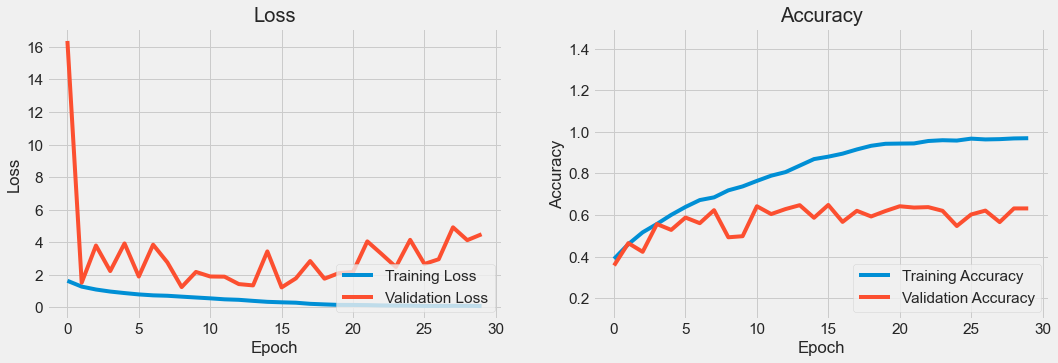

loading Results/Emsemble_5_Fold_20200911-150547/Fold_5/CNN_Net_Fold_5/parameter\weights-improvement-16-0.6490.hdf5 ......
loading Done, cost 0.4229702949523926 seconds
31/31 [==============================] - 13s 421ms/step
Accuracy  = 67.18 %


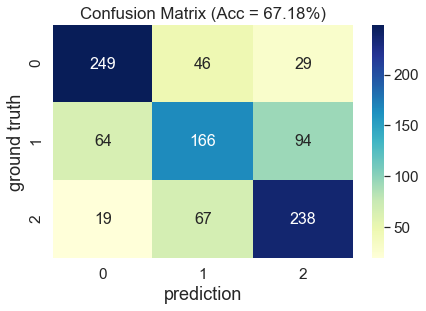

Fold 5: loading Inception ......
Fold 5: loading Done, cost 4.756673574447632 seconds
Epoch 1/30
91/91 [==============================] - 59s 653ms/step - loss: 1.6665 - accuracy: 0.3359 - val_loss: 44778.8164 - val_accuracy: 0.3406

Epoch 00001: val_accuracy improved from -inf to 0.34062, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_5/Inception_Fold_5/parameter/weights-improvement-01-0.3406.hdf5
Epoch 2/30
91/91 [==============================] - 22s 243ms/step - loss: 1.1588 - accuracy: 0.3427 - val_loss: 62219.8203 - val_accuracy: 0.3292

Epoch 00002: val_accuracy did not improve from 0.34062
Epoch 3/30
91/91 [==============================] - 22s 247ms/step - loss: 1.1104 - accuracy: 0.3630 - val_loss: 18610.9375 - val_accuracy: 0.3292

Epoch 00003: val_accuracy did not improve from 0.34062
Epoch 4/30
91/91 [==============================] - 22s 245ms/step - loss: 1.0451 - accuracy: 0.4629 - val_loss: 562.6152 - val_accuracy: 0.3219

Epoch 00004: val_accuracy did no

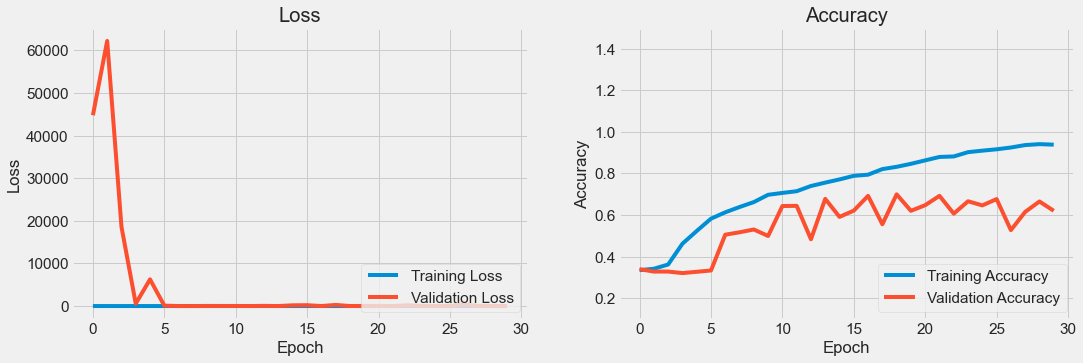

loading Results/Emsemble_5_Fold_20200911-150547/Fold_5/Inception_Fold_5/parameter\weights-improvement-19-0.7000.hdf5 ......
loading Done, cost 4.756673574447632 seconds
31/31 [==============================] - 11s 360ms/step
Accuracy  = 72.63 %


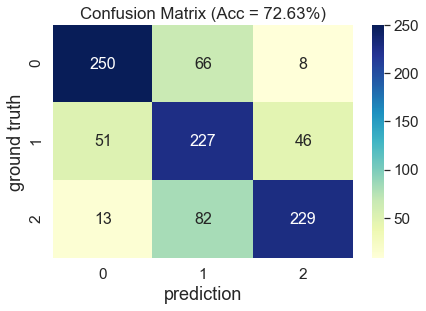

Fold 5: loading ResNet ......
Fold 5: loading Done, cost 2.810145378112793 seconds
Epoch 1/30
91/91 [==============================] - 41s 455ms/step - loss: 1.4536 - accuracy: 0.3475 - val_loss: 6.8807 - val_accuracy: 0.3292

Epoch 00001: val_accuracy improved from -inf to 0.32917, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_5/ResNet_Fold_5/parameter/weights-improvement-01-0.3292.hdf5
Epoch 2/30
91/91 [==============================] - 24s 259ms/step - loss: 1.2165 - accuracy: 0.3486 - val_loss: 1.4082 - val_accuracy: 0.3417

Epoch 00002: val_accuracy improved from 0.32917 to 0.34167, saving model to Results/Emsemble_5_Fold_20200911-150547/Fold_5/ResNet_Fold_5/parameter/weights-improvement-02-0.3417.hdf5
Epoch 3/30
91/91 [==============================] - 23s 258ms/step - loss: 1.1170 - accuracy: 0.3695 - val_loss: 4.8788 - val_accuracy: 0.3292

Epoch 00003: val_accuracy did not improve from 0.34167
Epoch 4/30
91/91 [==============================] - 24s 261ms/step - 

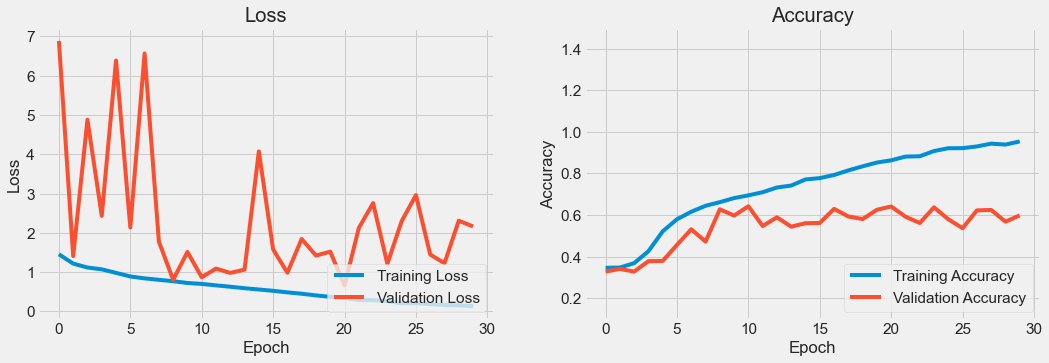

loading Results/Emsemble_5_Fold_20200911-150547/Fold_5/ResNet_Fold_5/parameter\weights-improvement-11-0.6427.hdf5 ......
loading Done, cost 2.810145378112793 seconds
31/31 [==============================] - 5s 149ms/step
Accuracy  = 66.15 %


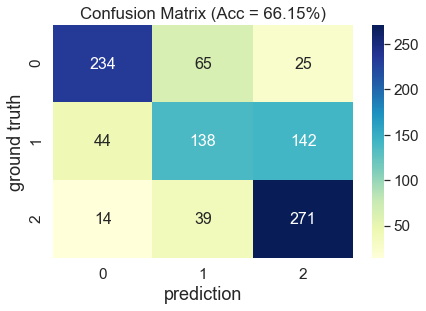

loading Results/Emsemble_5_Fold_20200911-150547/Fold_5/CNN_Net_Fold_5/parameter\weights-improvement-16-0.6490.hdf5 ......
loading Done, cost 5.082930326461792 seconds
31/31 [==============================] - 3s 104ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_5/Inception_Fold_5/parameter\weights-improvement-19-0.7000.hdf5 ......
loading Done, cost 484.4820601940155 seconds
31/31 [==============================] - 11s 360ms/step
loading Results/Emsemble_5_Fold_20200911-150547/Fold_5/ResNet_Fold_5/parameter\weights-improvement-11-0.6427.hdf5 ......
loading Done, cost 174.90201663970947 seconds
31/31 [==============================] - 9s 293ms/step
# of no majority: 29
Accuracy  = 72.12 %


D:\Dental_Project\Dental_Tool\Process_results.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[name] = results[idx]
D:\Dental_Project\Dental_Tool\Process_results.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Predict"] = vote_results


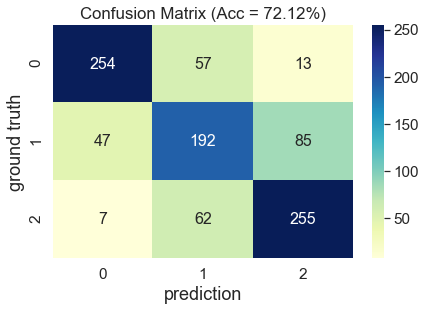

C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Vote: Accuracy  = 72.12 %, Probability: Accuracy  = 73.87 %


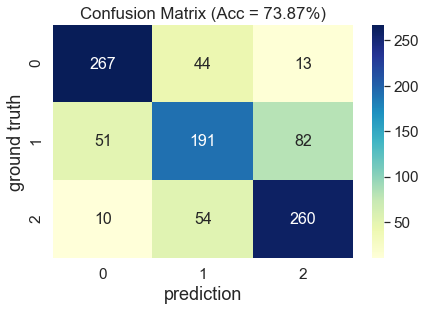

  Class 0 Class 1 Class 2  Acc
0     149      11       2  92%
1     105      46      11  65%
2      47     192      85  59%
3       7      62     255  79%


In [3]:
all_models = { "CNN_Net": CNN_Net, "Inception": Inception, "ResNet": ResNet }

root_dir  =  "Emsemble_5_Fold_" + datetime.now().strftime("%Y%m%d-%H%M%S")
init_directory(f"Results/{root_dir}/table")


performance_list = []

Fold_num = 5
num_params = 1
fold_data_num = 1
epochs     = 30

for train_dataset, valid_dataset, test_dataset, train_generator, valid_generator, test_generator in\
        K_Fold_balance_data_generator(dataset, argscale=argscale_num, k_fold_num=Fold_num):
        
        K.clear_session()
        print(f"Training dataset: {len(train_dataset)}, Validation dataset: {len(valid_dataset)}, Testing dataset: {len(test_dataset)}" )
        
        init_directory(f"Results/{root_dir}/Fold_{fold_data_num}/table")
           
        train_dataset.to_csv(f"Results/{root_dir}/Fold_{fold_data_num}/table/train_dataset.csv", index=False)
        valid_dataset.to_csv(f"Results/{root_dir}/Fold_{fold_data_num}/table/valid_dataset.csv", index=False)
        test_dataset.to_csv(f"Results/{root_dir}/Fold_{fold_data_num}/table/test_dataset.csv"  , index=False)
        
        print(set(train_dataset.source) & set(valid_dataset.source))
        print(set(valid_dataset.source) & set(test_dataset.source))
        print(set(train_dataset.source) & set(test_dataset.source))
        
        K.clear_session()
        best_models = []
        for model_name, model_fnc in all_models.items():
                K.clear_session()
                
                param_dir  = f"{model_name}_Fold_{fold_data_num}"
                print(f"Fold {fold_data_num}: loading {model_name} ......")
                
                start = time.time()
                model = model_fnc(input_shape=(200, 180, 1), classes=len(np.unique(train_dataset["Class"])))
                end = time.time()
                elapse = end - start
                print(f"Fold {fold_data_num}: loading Done, cost {elapse} seconds")
                
                

                init_directory(f"Results/{root_dir}/Fold_{fold_data_num}/{param_dir}/parameter")
            
                filepath="Results/%s/Fold_%d/%s/parameter/weights-improvement-{epoch:02d}-{val_accuracy:.4f}.hdf5" \
                            %(root_dir, fold_data_num, param_dir)
                checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
                
                # change 
                history = model.fit_generator(
                                        generator=train_generator,
                                        validation_data=valid_generator,
                                        epochs=epochs,
                                        workers=2,
                                        shuffle=True,
                                        verbose=1,
                                        callbacks=[checkpoint]
                                       )
                plot_result(history, f"Results/{root_dir}/Fold_{fold_data_num}/{param_dir}")

               

                
                K.clear_session()
                
                top_k_param = get_k_top_value(f"Results/{root_dir}/Fold_{fold_data_num}/{param_dir}/parameter",  k_th = num_params )
                best_models += top_k_param
                
                idx = 0
                K.clear_session()
                best_for_one_model = top_k_param[0]
                print(f"loading {best_for_one_model} ......")
                start = time.time()
                model = load_model(best_for_one_model)
                end = time.time()
                print(f"loading Done, cost {elapse} seconds")
                pred = model.predict_generator(test_generator, verbose=1)
                pred = np.argmax(pred, axis=1)
                pred = pred[:len(test_dataset)]
                y = test_dataset.Class.astype('int')
                confusion = confusion_matrix(y, pred)
                curr_acc = (pred == y).mean() * 100
                title = "Accuracy  = {:5.2f} %".format(curr_acc)
                print(title)
                plot_confusion_matrix(confusion, len(np.unique(test_dataset.Class)), curr_acc, f"Results/{root_dir}/Fold_{fold_data_num}/{param_dir}", idx)
                K.clear_session()
                        
                    
        
        test_results, test_prob = [], []

        K.clear_session()
        for best_param_path in best_models:
                K.clear_session()
                print(f"loading {best_param_path} ......")
                start = time.time()
                best_model = load_model(best_param_path)
                end = time.time()
                elapse = end - start
                print(f"loading Done, cost {elapse} seconds")
                
                test_predict = best_model.predict_generator(test_generator, verbose=1)
                test_predict = test_predict[:len(test_dataset)]
                test_prob.append(test_predict)
                
                test_result  = np.argmax(test_predict, axis=1)
                test_results.append(test_result)
                K.clear_session()
        
        test_dataset_vote  = vote(test_dataset , test_results, list(all_models.keys()) )
        
        confusion = confusion_matrix(test_dataset_vote.Class.astype('int'), test_dataset_vote.Predict.astype('int'))
        curr_acc = (test_dataset_vote.Class == test_dataset_vote.Predict).mean() * 100
        title = "Accuracy  = {:5.2f} %".format(curr_acc)
        print(title)
        init_directory(f"Results/{root_dir}/Fold_{fold_data_num}/table")
        plot_confusion_matrix(confusion, len(np.unique(test_dataset.Class)), curr_acc, f"Results/{root_dir}/Fold_{fold_data_num}", 0)
         
        # sum of probability
        test_prob = np.round(test_prob, 2)
        test_dataset_vote["CNN_Prob"]       = pd.Series(test_prob[0].tolist())
        test_dataset_vote["Inception_Prob"] = pd.Series(test_prob[1].tolist())
        test_dataset_vote["Resnet_Prob"]    = pd.Series(test_prob[2].tolist())
        test_dataset_vote["Sum of Probability"] = pd.Series(np.sum(test_prob, axis=0).tolist())
        
        vote_by_prob = np.argmax(np.sum(test_prob, axis=0), axis=1)
        test_dataset_vote["Predict_prob"] = vote_by_prob
        confusion_prob = confusion_matrix(test_dataset_vote.Class.astype('int'), vote_by_prob)
        curr_acc_prob = (test_dataset_vote.Class == vote_by_prob ).mean() * 100
        title_prob = "Accuracy  = {:5.2f} %".format(curr_acc_prob)
        print(f"Vote: {title}, Probability: {title_prob}")
        
        plot_confusion_matrix(confusion_prob, len(np.unique(test_dataset.Class)), curr_acc_prob, f"Results/{root_dir}/Fold_{fold_data_num}", 0)
        test_dataset_vote.to_csv(f"Results/{root_dir}/Fold_{fold_data_num}/table/test_predict_vote.csv", index=False)
        print(statistic(test_dataset_vote))
        K.clear_session()
        
        performance_list.append(curr_acc)
        fold_data_num += 1

In [4]:
total_score = np.mean(performance_list)
title = "Accuracy  = {:5.2f} %".format(total_score)
title

'Accuracy  = 68.12 %'